## import

In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPool2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt


### 학습 데이터 분할하기

In [4]:
(x_train, _), (x_test , _) = mnist.load_data()

x_train = x_train.reshape(
    x_train.shape[0], 28, 28
).astype('float32')/ 255

x_test = x_test.reshape(
    x_test.shape[0], 28, 28
).astype('float32')/ 255

### 모델 만들기
인코더 부분

In [9]:
autoencoder = Sequential()

autoencoder.add(
    Conv2D(
        16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'
    )
)

autoencoder.add(MaxPool2D(2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPool2D(2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

### 디코더 부분

In [10]:
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())

autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())

autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())

autoencoder.add(Conv2D(1, kernel_size=3, padding='same',activation='sigmoid'))

autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 8)          

In [11]:
autoencoder.compile(
    optimizer='adam', loss='binary_crossentropy'
)

autoencoder.fit(
    x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test, x_test)
)

Epoch 1/50


2022-08-26 01:37:31.151888: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-26 01:37:31.354609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.2263

2022-08-26 01:37:43.540781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 13s 24ms/step - loss: 0.2263 - val_loss: 0.1463
Epoch 2/50
469/469 [==============================] - 11s 24ms/step - loss: 0.1322 - val_loss: 0.1219
Epoch 3/50
469/469 [==============================] - 11s 24ms/step - loss: 0.1164 - val_loss: 0.1105
Epoch 4/50
469/469 [==============================] - 11s 23ms/step - loss: 0.1088 - val_loss: 0.1049
Epoch 5/50
469/469 [==============================] - 10s 22ms/step - loss: 0.1044 - val_loss: 0.1015
Epoch 6/50
469/469 [==============================] - 11s 23ms/step - loss: 0.1014 - val_loss: 0.0989
Epoch 7/50
469/469 [==============================] - 11s 24ms/step - loss: 0.0991 - val_loss: 0.0970
Epoch 8/50
469/469 [==============================] - 10s 22ms/step - loss: 0.0972 - val_loss: 0.0952
Epoch 9/50
469/469 [==============================] - 11s 24ms/step - loss: 0.0956 - val_loss: 0.0941
Epoch 10/50
469/469 [==============================] - 10s 22ms/step - loss: 0.0943 - val_los

313/313 [==============================] - 2s 6ms/step


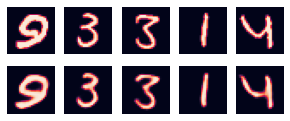

In [14]:
random_test = np.random.randint(x_test.shape[0], size=5)

ae_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(7,2))

for i, index in enumerate(random_test):
    ax = plt.subplot(2, 7, i+1)

    plt.imshow(x_test[index].reshape(28,28))
    ax.axis('off')

    ax = plt.subplot(2,7,7+i+1)
    plt.imshow(ae_imgs[index].reshape(28,28))

    ax.axis('off')
plt.show()